# Project: Wrangling and Analyze Data

In [1]:
import requests 
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt
import os
import numpy as np
from functools import reduce
import seaborn as sns


## Gathering the Data

### Twitter Archive (Local File)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Image Prediction (URL)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)


In [4]:
# load the image predictions as a dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

### Tweets (Twitter API)

In [5]:
#Credentials for accessing API 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
#Store data on tweet_json.txt from API
working = []
not_working = []
with open('tweet_json.txt','w') as file:
    counter = 0
    for tweet_id in twitter_archive['tweet_id']:
        try:
            counter += 1
            print(counter, tweet_id)
            tweet_details = api.get_status(tweet_id)
            #convert to json and write
            json.dump(tweet_details._json, file)
            file.write('\n')
            #append to list of diectionaries
            working.append(tweet_id)
            
        except Exception as e:
            print(tweet_id,e)
            #append to list of diectionaries
            not_working.append(tweet_id)
            

1 892420643555336193
2 892177421306343426
3 891815181378084864
4 891689557279858688
5 891327558926688256
6 891087950875897856
7 890971913173991426
8 890729181411237888
9 890609185150312448
10 890240255349198849
11 890006608113172480
12 889880896479866881
13 889665388333682689
14 889638837579907072
15 889531135344209921
16 889278841981685760
17 888917238123831296
18 888804989199671297
19 888554962724278272
20 888202515573088257
888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
21 888078434458587136
22 887705289381826560
23 887517139158093824
24 887473957103951883
25 887343217045368832
26 887101392804085760
27 886983233522544640
28 886736880519319552
29 886680336477933568
30 886366144734445568
31 886267009285017600
32 886258384151887873
33 886054160059072513
34 885984800019947520
35 885528943205470208
36 885518971528720385
37 885311592912609280
38 885167619883638784
39 884925521741709313
40 884876753390489601
41 884562892145688576
42 884441805382717440
43 884

307 836001077879255040
308 835685285446955009
309 835574547218894849
310 835536468978302976
311 835309094223372289
312 835297930240217089
313 835264098648616962
314 835246439529840640
315 835172783151792128
316 835152434251116546
317 834931633769889797
318 834786237630337024
319 834574053763584002
320 834477809192075265
321 834458053273591808
322 834209720923721728
323 834167344700198914
324 834089966724603904
325 834086379323871233
326 833863086058651648
327 833826103416520705
328 833732339549220864
329 833722901757046785
330 833479644947025920
331 833124694597443584
332 832998151111966721
333 832769181346996225
334 832757312314028032
335 832682457690300417
336 832645525019123713
337 832636094638288896
338 832397543355072512
339 832369877331693569
340 832273440279240704
341 832215909146226688
342 832215726631055365
343 832088576586297345
344 832040443403784192
345 832032802820481025
346 831939777352105988
347 831926988323639298
348 831911600680497154
349 831670449226514432
350 8316500

650 792913359805018113
651 792883833364439040
652 792773781206999040
653 792394556390137856
654 792050063153438720
655 791821351946420224
656 791784077045166082
657 791780927877898241
658 791774931465953280
659 791672322847637504
660 791406955684368384
661 791312159183634433
662 791026214425268224
663 790987426131050500
664 790946055508652032
665 790723298204217344
666 790698755171364864
667 790581949425475584
668 790337589677002753
669 790277117346975746
670 790227638568808452
671 789986466051088384
672 789960241177853952
673 789903600034189313
674 789628658055020548
675 789599242079838210
676 789530877013393408
677 789314372632018944
678 789280767834746880
679 789268448748703744
680 789137962068021249
681 788908386943430656
682 788765914992902144
683 788552643979468800
684 788412144018661376
685 788178268662984705
686 788150585577050112
687 788070120937619456
688 788039637453406209
689 787810552592695296
690 787717603741622272
691 787397959788929025
692 787322443945877504
693 7871119

985 749317047558017024
986 749075273010798592
987 749064354620928000
988 749036806121881602
989 748977405889503236
990 748932637671223296
991 748705597323898880
992 748699167502000129
993 748692773788876800
994 748575535303884801
995 748568946752774144
996 748346686624440324
997 748337862848962560
998 748324050481647620
999 748307329658011649
1000 748220828303695873
1001 747963614829678593
1002 747933425676525569
1003 747885874273214464
1004 747844099428986880
1005 747816857231626240
1006 747651430853525504
1007 747648653817413632
1008 747600769478692864
1009 747594051852075008
1010 747512671126323200
1011 747461612269887489
1012 747439450712596480
1013 747242308580548608
1014 747219827526344708
1015 747204161125646336
1016 747103485104099331
1017 746906459439529985
1018 746872823977771008
1019 746818907684614144
1020 746790600704425984
1021 746757706116112384
1022 746726898085036033
1023 746542875601690625
1024 746521445350707200
1025 746507379341139972
1026 746369468511756288
1027 74

1327 706153300320784384
1328 705975130514706432
1329 705970349788291072
1330 705898680587526145
1331 705786532653883392
1332 705591895322394625
1333 705475953783398401
1334 705442520700944385
1335 705428427625635840
1336 705239209544720384
1337 705223444686888960
1338 705102439679201280
1339 705066031337840642
1340 704871453724954624
1341 704859558691414016
1342 704847917308362754
1343 704819833553219584
1344 704761120771465216
1345 704499785726889984
1346 704491224099647488
1347 704480331685040129
1348 704364645503647744
1349 704347321748819968
1350 704134088924532736
1351 704113298707505153
1352 704054845121142784
1353 703774238772166656
1354 703769065844768768
1355 703631701117943808
1356 703611486317502464
1357 703425003149250560
1358 703407252292673536
1359 703382836347330562
1360 703356393781329922
1361 703268521220972544
1362 703079050210877440
1363 703041949650034688
1364 702932127499816960
1365 702899151802126337
1366 702684942141153280
1367 702671118226825216
1368 70259809971

1669 682638830361513985
1670 682429480204398592
1671 682406705142087680
1672 682393905736888321
1673 682389078323662849
1674 682303737705140231
1675 682259524040966145
1676 682242692827447297
1677 682088079302213632
1678 682059653698686977
1679 682047327939461121
1680 682032003584274432
1681 682003177596559360
1682 681981167097122816
1683 681891461017812993
1684 681694085539872773
1685 681679526984871937
1686 681654059175129088
1687 681610798867845120
1688 681579835668455424
1689 681523177663676416
1690 681340665377193984
1691 681339448655802368
1692 681320187870711809
1693 681302363064414209
1694 681297372102656000
1695 681281657291280384
1696 681261549936340994
1697 681242418453299201
1698 681231109724700672
1699 681193455364796417
1700 680970795137544192
1701 680959110691590145
1702 680940246314430465
1703 680934982542561280
1704 680913438424612864
1705 680889648562991104
1706 680836378243002368
1707 680805554198020098
1708 680801747103793152
1709 680798457301471234
1710 68060929307

2008 672264251789176834
2009 672256522047614977
2010 672254177670729728
2011 672248013293752320
2012 672245253877968896
2013 672239279297454080
2014 672231046314901505
2015 672222792075620352
2016 672205392827572224
2017 672169685991993344
2018 672160042234327040
2019 672139350159835138
2020 672125275208069120
2021 672095186491711488
2022 672082170312290304
2023 672068090318987265
2024 671896809300709376
2025 671891728106971137
2026 671882082306625538
2027 671879137494245376
2028 671874878652489728
2029 671866342182637568
2030 671855973984772097
2031 671789708968640512
2032 671768281401958400
2033 671763349865160704
2034 671744970634719232
2035 671743150407421952
2036 671735591348891648
2037 671729906628341761
2038 671561002136281088
2039 671550332464455680
2040 671547767500775424
2041 671544874165002241
2042 671542985629241344
2043 671538301157904385
2044 671536543010570240
2045 671533943490011136
2046 671528761649688577
2047 671520732782923777
2048 671518598289059840
2049 67151135042

2350 666051853826850816
2351 666050758794694657
2352 666049248165822465
2353 666044226329800704
2354 666033412701032449
2355 666029285002620928
2356 666020888022790149


In [7]:
#Reading json content as pandas dataframe
tweet_data = pd.read_json('tweet_json.txt', lines=True, encoding='utf-8')

In [8]:
# extract certain columns to daraframe
tweet_data = tweet_data[['id', 'favorite_count', 'retweet_count']]

## Assessing Data

### Twitter Archive

In [9]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1945,673707060090052608,NaN,NaN,2015-12-07 03:34:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None
490,813812741911748608,NaN,NaN,2016-12-27 18:24:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Gary, Carrie Fisher's dog. Idk what I can...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/813812741...,14,10,Gary,None,None,None,None
1098,736010884653420544,NaN,NaN,2016-05-27 01:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Right after you graduate vs when you remember ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736010884...,10,10,None,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Donny         1
Juckson       1
Mimosa        1
Chadrick      1
Gerbald       1
Name: name, Length: 957, dtype: int64

In [15]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Image Predictions Data

In [19]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
969,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,golden_retriever,0.772685,True,Labrador_retriever,0.071665,True,golfcart,0.020993,False
99,667773195014021121,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,West_Highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False
1394,767500508068192258,https://pbs.twimg.com/media/Cqa1ofnXEAAG0yn.jpg,1,chow,0.483228,True,golden_retriever,0.165063,True,Norfolk_terrier,0.060173,True


In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
china_cabinet           1
microwave               1
park_bench              1
dining_table            1
lacewing                1
Name: p1, Length: 378, dtype: int64

In [23]:
image_prediction['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [24]:
image_prediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
sarong                  1
can_opener              1
grey_whale              1
barbershop              1
Madagascar_cat          1
Name: p2, Length: 405, dtype: int64

In [25]:
image_prediction['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [26]:
image_prediction['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
goose                  1
African_chameleon      1
otter                  1
goldfish               1
kimono                 1
Name: p3, Length: 408, dtype: int64

In [27]:
image_prediction['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [28]:
image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Tweets Data

In [29]:
tweet_data.sample(5)

,id,favorite_count,retweet_count
1186,715342466308784130,2936,660
1617,683857920510050305,3677,1075
1285,707021089608753152,3949,1298
497,810984652412424192,5256,1413
1614,684147889187209216,2891,1464


In [30]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2329 non-null   int64
 1   favorite_count  2329 non-null   int64
 2   retweet_count   2329 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [31]:
tweet_data['favorite_count'].value_counts()

0        162
1031       5
229        4
1430       4
1224       3
        ... 
2932       1
10820      1
4677       1
583        1
4085       1
Name: favorite_count, Length: 1988, dtype: int64

In [32]:
tweet_data['retweet_count'].value_counts()

438     5
2393    4
920     4
214     4
2178    4
       ..
297     1
2348    1
301     1
6446    1
3915    1
Name: retweet_count, Length: 1673, dtype: int64

## Data Quality Issue

### Twitter Archive Data
- data contains retweets(i.e. retweeted_status_id and retweeted_status_user_id have 181 non-null values)
- tweet_id is an integer 
- name column have incorrect values (i.e. None, "a")
- Miss some expended_urls 

### Image Prediction Data
- Missing data: there are 2356 data in twitter archive table, but only 2075 in image prediction data, means there is missing data or not all tweets had pictures
- tweet_id is an integer
- p1,p2,p3 inconsistent capitalization

### Tweets Data
- Missing data: there are 2356 data in twitter archive table, but 2330 in this data, means there is missing data, probably the tweets been deleted 
- id is not consistent with other datasets tweet_id


## Data Tidiness Issues

### Twitter Archive Data
- 1 varible (dog stage) in 4 different columns (doggo, floofer, pupper, puppo)

### Image Prediction Data
- This data should be combined with twitter archive data, since they both are about same tweet information 

### Tweets Data
- This data should be combined with twitter archive data, since they both are about same tweet information





## Cleaning Data

In [33]:
# make copies of the dataframes for cleaning
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_data_clean = tweet_data.copy()


### Quality Issue 1/2 - Retweets columns

### Define
- Remove the data where 'retweeted_status_id' is not a NaN， only keep the rows that is NaN
- Remove 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' columns

### Code

In [34]:
# Keep the rows where 'retweeted_status_id' is NaN
twitter_archive_clean = twitter_archive_clean[np.isnan(twitter_archive_clean.retweeted_status_id)]


In [35]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                                                  axis=1)

### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Quality Issue 3 - data type

### Define 
Change tweet_id to a string/object

### Code

In [37]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(str)
tweet_data_clean['id'] = tweet_data_clean['id'].astype(str)

### Test

In [38]:
twitter_archive_clean['tweet_id'].dtypes

dtype('O')

In [39]:
image_prediction_clean['tweet_id'].dtypes

dtype('O')

In [40]:
tweet_data_clean['id'].dtypes

dtype('O')

### Quality Issue 4/5 - name column

### Define
- Replace 'None' with 'NaN'
- Replace all inaccurant name(most of them are lowercase letter, i.e. a, an, the, very, etc.) with 'NaN'

### Code

In [41]:
# Find all names that starts with a lowercase letter 
lowercase_names = []
for row in twitter_archive_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [42]:
# Replace lowercase_names with NaN
twitter_archive_clean['name'].replace(lowercase_names, np.nan, inplace=True)

In [43]:
# Replace 'None' with NaN
twitter_archive_clean['name'].replace('None', np.nan, inplace=True)

### Test

In [44]:
twitter_archive_clean['name'].value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
             ..
Jebberson     1
Halo          1
Miley         1
Alexander     1
Gerbald       1
Name: name, Length: 930, dtype: int64

### Quality Issue 6 - rename 

### Define
Rename 'id' in Tweets Data to 'tweet_id' to make it consistent with other two data

### Code

In [45]:
tweet_data_clean.rename(columns={'id':'tweet_id'}, inplace=True)

### Test

In [46]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2329 non-null   object
 1   favorite_count  2329 non-null   int64 
 2   retweet_count   2329 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Quality Issue 7 - missing urls

### Define
Use tweet_id to get expanded_urls

### Code

In [47]:
# If expanded_urls is null, add by using tweet_id
def add_urls(row):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        # Get tweet_id
        tweet_id = row['tweet_id']
        # Make new URL and save into expanded_urls
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        # return updated row
        return row


# Save dataframe with missing urls
twitter_archive_clean = twitter_archive_clean.apply(add_urls, axis=1)

### Test

In [48]:
# Check that there are no empty expanded_urls
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue 8 - inconsistent capitalization

### Define
Make all strings in p1,p2,p3 lowercase

### Code

In [49]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.lower()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.lower()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.lower()

### Test

In [50]:
image_prediction_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Tidiness Issue 1 - Merge all dataframes

### Define
Merge all three dataframes, since they are all about same information related to 'tweet_id'

### Code

In [51]:
# Merge dataframes on 'tweet_id'
dfs = [twitter_archive_clean, image_prediction_clean, tweet_data_clean]
twitter_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'),dfs)

### Test

In [52]:
twitter_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,35144,7410
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,30410,5515
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22860,3639
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,38421,7589
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,36674,8163


In [53]:
twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1986 non-null   object 
 4   source                 1986 non-null   object 
 5   text                   1986 non-null   object 
 6   expanded_urls          1986 non-null   object 
 7   rating_numerator       1986 non-null   int64  
 8   rating_denominator     1986 non-null   int64  
 9   name                   1342 non-null   object 
 10  doggo                  1986 non-null   object 
 11  floofer                1986 non-null   object 
 12  pupper                 1986 non-null   object 
 13  puppo                  1986 non-null   object 
 14  jpg_url                1986 non-null   object 
 15  img_

### Tidiness Issue 2 - Create dog stage column

### Define
Extract the dog stages from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns

### Code

In [54]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter_final['dog_stage'] = twitter_final['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [55]:
# Check that first few instances of dog_stage are similar to that which was previously extracted
twitter_final[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(30)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [56]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_final = twitter_final.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [57]:
twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1986 non-null   object 
 4   source                 1986 non-null   object 
 5   text                   1986 non-null   object 
 6   expanded_urls          1986 non-null   object 
 7   rating_numerator       1986 non-null   int64  
 8   rating_denominator     1986 non-null   int64  
 9   name                   1342 non-null   object 
 10  jpg_url                1986 non-null   object 
 11  img_num                1986 non-null   int64  
 12  p1                     1986 non-null   object 
 13  p1_conf                1986 non-null   float64
 14  p1_dog                 1986 non-null   bool   
 15  p2  

## Storing DataFrame

In [58]:
twitter_final.to_csv('twitter_archive_master.csv')

## Insights and Visualization 

In [59]:
twitter_final.loc[:,['retweet_count','favorite_count']].max()

retweet_count      74790
favorite_count    151133
dtype: int64

In [60]:
twitter_final.loc[twitter_final['retweet_count']==74790]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
768,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,...,True,ice_bear,0.044681,False,whippet,0.018442,True,151133,74790,doggo


In [61]:
twitter_final.text[769]

"This is Geno. He's a Wrinkled Baklavian Velveeta. Looks sad but that's just the extra skin. 11/10 would smoosh face https://t.co/Kxda28JmQ2"

> The text "Here's a doggo realizing you can stand in a pool." get the most retweets.

In [62]:
twitter_final.loc[twitter_final['favorite_count']== 151137]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage


> The same tweet content got the most likes.

/Users/xiaokelaitipalidan/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


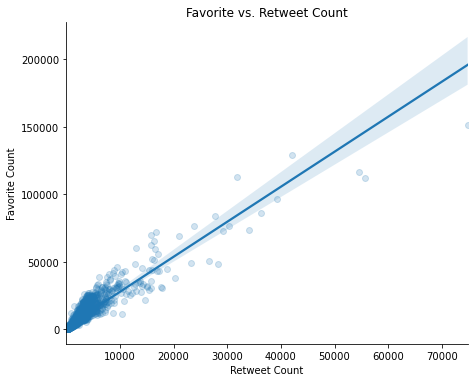

In [63]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_final,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

> Retweet and Favorite counts are highly positively correlated.

In [64]:
twitter_final.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1948
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

> Most people tweet WeRateDogs with iphone.